In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math

from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

In [2]:
from pandas.plotting import autocorrelation_plot as auto_corr
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from pmdarima import auto_arima

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

In [5]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [7]:
from sklearn import preprocessing

In [8]:
pd.options.display.max_columns=100 # to see columns 

In [8]:
df = pd.read_csv('clean_data.csv')

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

In [12]:
df.set_index('Date', inplace=True)

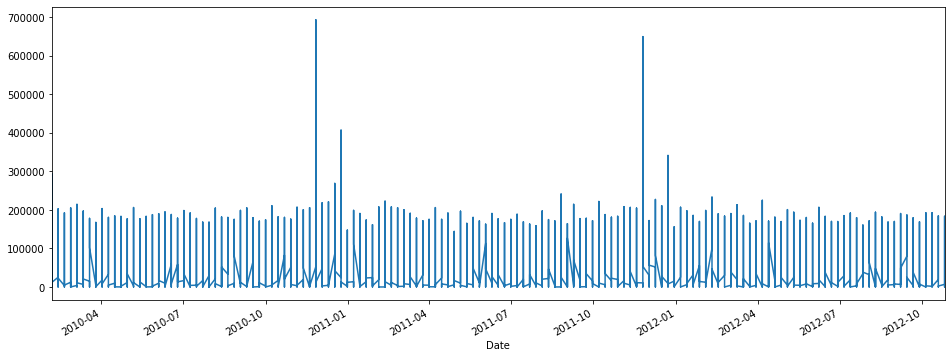

In [13]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [14]:
df_week = df.resample('W').mean()

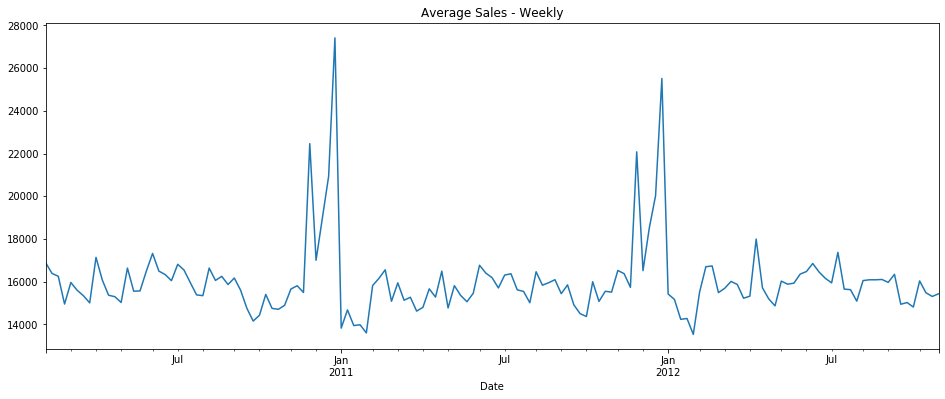

In [15]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [16]:
df_month = df.resample('MS').mean()

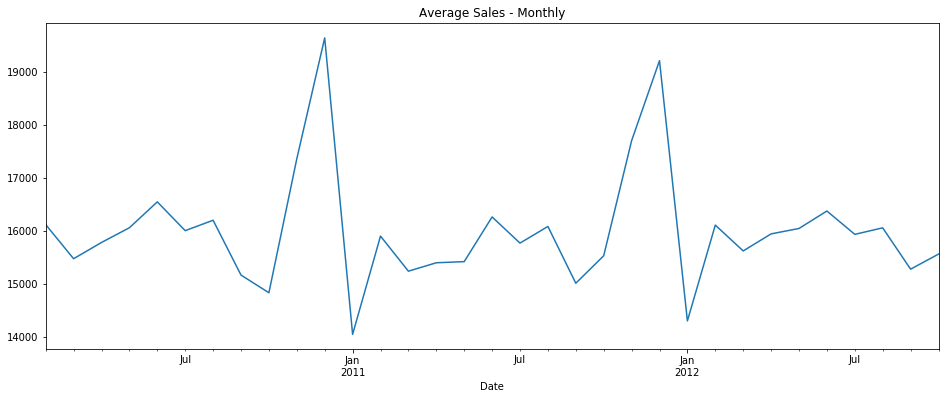

In [17]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [18]:
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

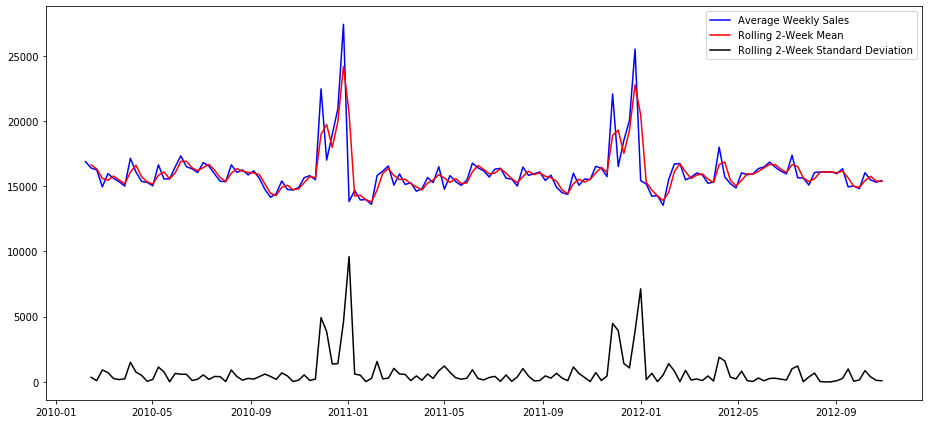

In [19]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [20]:
adfuller(df_week['Weekly_Sales'])

(-5.9271072237375595,
 2.4290492082043753e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

In [21]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


In [22]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price


X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

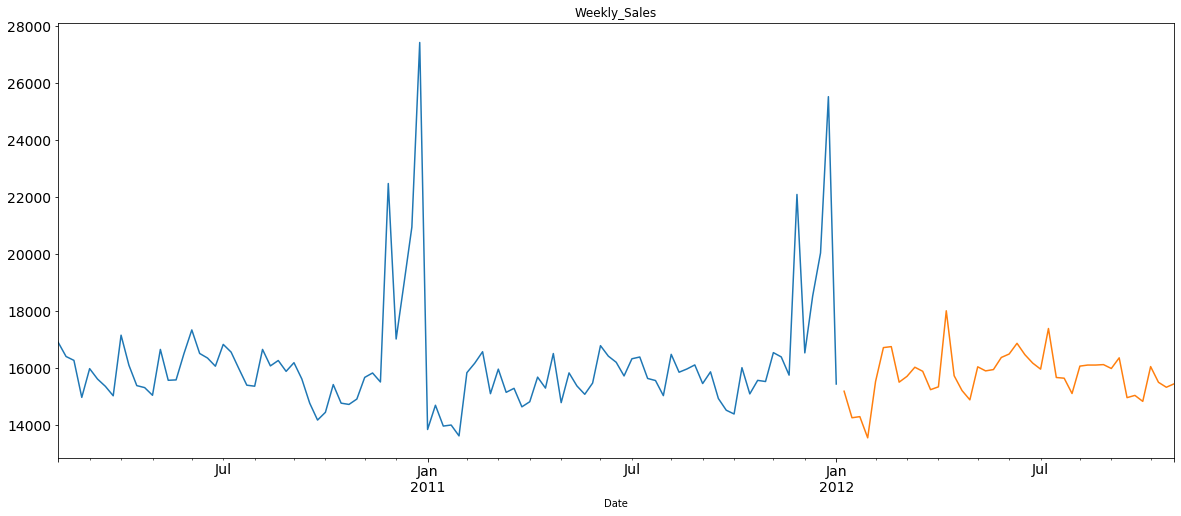

In [23]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [24]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

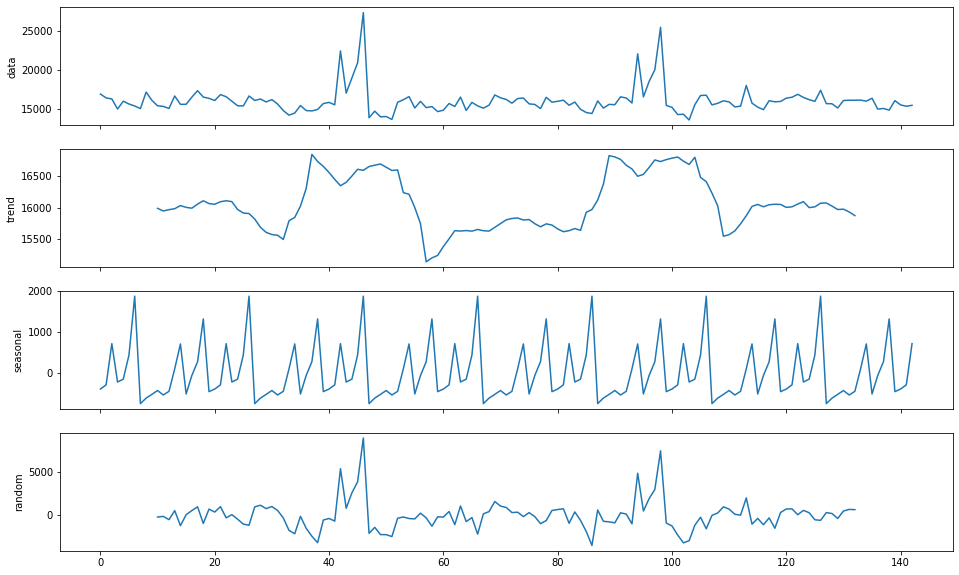

In [25]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

In [26]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna()

In [27]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

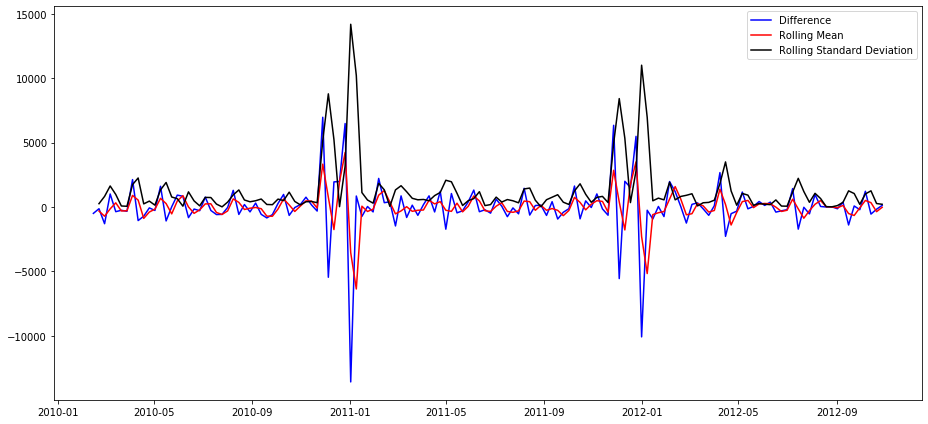

In [28]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [29]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()

In [30]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

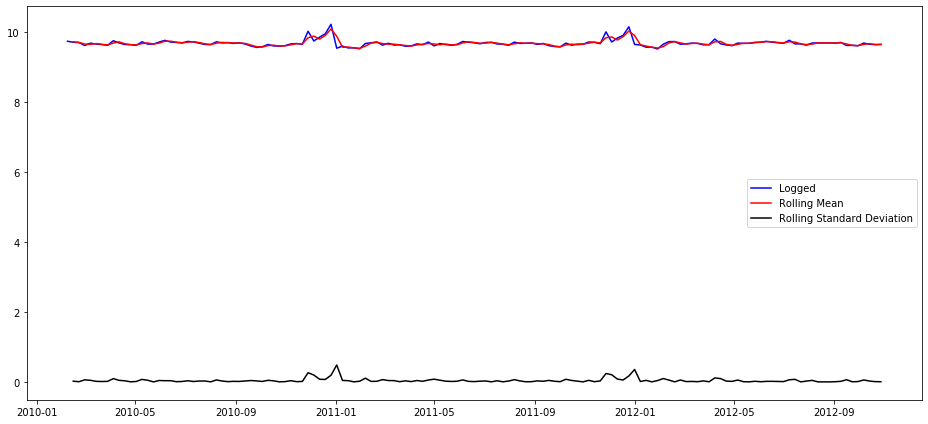

In [31]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [248]:
# train_data1 = train_data['Weekly_Sales']
# test_data1 = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_log, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_log)

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1826.858, BIC=1832.048, Time=0.022 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1793.619, BIC=1801.404, Time=0.108 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1795.532, BIC=1805.912, Time=0.191 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1793.997, BIC=1806.973, Time=0.145 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 1) (constant=True); AIC=1794.022, BIC=1809.593, Time=0.414 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 1) (constant=True); AIC=1776.663, BIC=1794.828, Time=0.216 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1804.051, BIC=1811.836, Time=0.020 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1792.816, BIC=1803.197, Time=0.139 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1794.966, BIC=1807.941, Time=0.138 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1784.311, BIC=1799.882, Time=0.269 seconds
Fit ARIMA: (1, 0, 4)

ARIMA(maxiter=200, method='lbfgs', order=(0, 0, 5), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

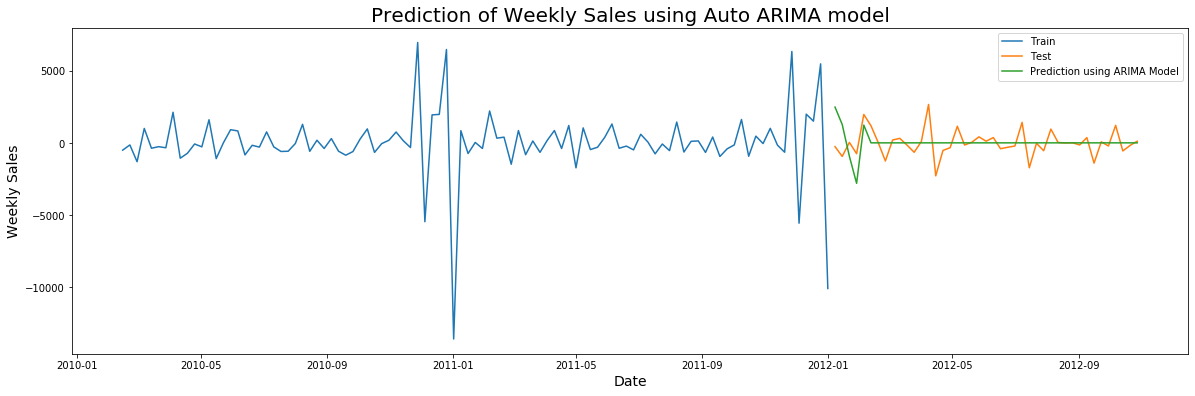

In [249]:
forecast = model_auto_arima.predict(n_periods=len(test_data_log))
forecast = pd.DataFrame(forecast,index = test_data_log.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
plt.plot(train_data_log, label='Train')
plt.plot(test_data_log, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [188]:
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data_log, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data_log, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data_log, forecast))

Mean Squared Error (MSE) of ARIMA:  1083275.2264509543
Root Mean Squared Error (RMSE) of ARIMA:  1040.8050857153582
Mean Absolute Deviation (MAD) of ARIMA:  710.6629269129578


# ExponentialSmoothing

In [167]:
train_data1

Date
2010-02-07    16887.602166
2010-02-14    16390.912208
2010-02-21    16255.185970
2010-02-28    14955.932194
2010-03-07    15964.821240
                  ...     
2011-12-04    16518.598642
2011-12-11    18514.347794
2011-12-18    20028.907720
2011-12-25    25513.510129
2012-01-01    15425.226436
Freq: W-SUN, Name: Weekly_Sales, Length: 100, dtype: float64

In [180]:
df_week_diff 

Date
2010-02-14    -496.689958
2010-02-21    -135.726238
2010-02-28   -1299.253776
2010-03-07    1008.889046
2010-03-14    -364.671335
                 ...     
2012-09-30    -209.764065
2012-10-07    1221.821050
2012-10-14    -552.745975
2012-10-21    -173.381656
2012-10-28     122.226470
Freq: W-SUN, Name: Weekly_Sales, Length: 142, dtype: float64

In [181]:
train_data_log = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_log = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [137]:
ExponentialSmoothing?

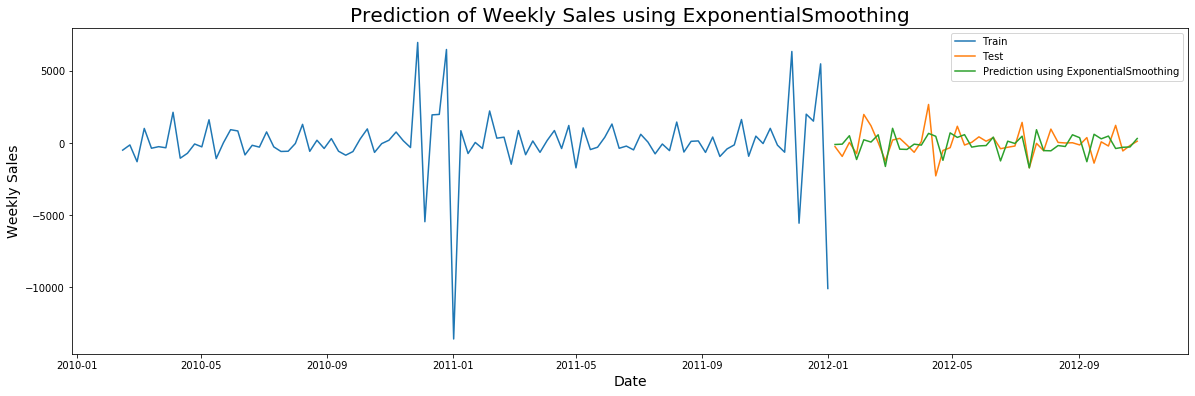

In [246]:
from statsmodels.tsa.api import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(train_data_log, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=False).fit() #Taking additive trend and seasonality.
pred = model_holt_winters.forecast(len(test_data_log))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_log, label='Train')
plt.plot(test_data_log, label='Test')
plt.plot(pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [235]:
print('Mean Squared Error (MSE) of Holt-Winters: ', mean_squared_error(test_data_log, pred))
print('Root Mean Squared Error (RMSE) of Holt-Winters: ', math.sqrt(mean_squared_error(test_data_log, pred)))
print('Mean Absolute Deviation (MAE) of Holt-Winters: ', mean_absolute_error(test_data_log, pred))

Mean Squared Error (MSE) of Holt-Winters:  884742.921211243
Root Mean Squared Error (RMSE) of Holt-Winters:  940.60774035261
Mean Absolute Deviation (MAD) of Holt-Winters:  713.6092891173398


In [243]:
def MAPE(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [244]:
def report_metrics(y_true, y_pred):
    print("Explained Variance:\n\t", metrics.explained_variance_score(y_true, y_pred))
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("MAPE:\n\t", MAPE(y_true, y_pred))
    print("r^2:\n\t", metrics.r2_score(y_true, y_pred))

In [252]:
report_metrics(test_data_log, pred)

Explained Variance:
	 -0.11671278224269632
MAE:
	 713.6092891173398
RMSE:
	 940.60774035261
MAPE:
	 10816.667004703131
r^2:
	 -0.1228589259378805


# ARCH

In [193]:
am = arch_model(train_data1, vol='GARCH',power=1,o=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 875.6525494725021
Iteration:     10,   Func. Count:     75,   Neg. LLF: 875.626895183725
Iteration:     15,   Func. Count:    110,   Neg. LLF: 875.0404338810246
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 875.0377441707998
            Iterations: 18
            Function evaluations: 134
            Gradient evaluations: 18
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:           Weekly_Sales   R-squared:                      -0.005
Mean Model:             Constant Mean   Adj. R-squared:                 -0.005
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -875.038
Distribution:                  Normal   AIC:                           1760.08
Method:            Maximum Likelihood   BIC:                           1773.10
                                        No. Observations:                  100
Date:                

                           AR - TARCH/ZARCH Model Results                           
Dep. Variable:                 Weekly_Sales   R-squared:                       0.006
Mean Model:                              AR   Adj. R-squared:                 -0.088
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -595.873
Distribution:      Standardized Student's t   AIC:                           1215.75
Method:                  Maximum Likelihood   BIC:                           1242.73
                                              No. Observations:                   70
Date:                      Mon, May 04 2020   Df Residuals:                       58
Time:                              15:11:45   Df Model:                           12
                                    Mean Model                                    
                     coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------

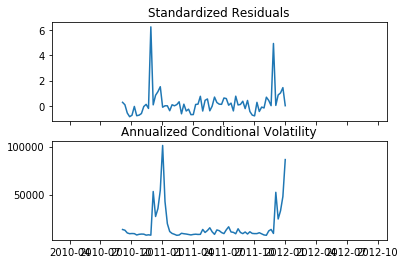

In [191]:
# data=df_week['Weekly_Sales']
split_date = test_data1.head(1).index[0]
ar = ARX(data, lags=[1, 3, 5, 10, 20, 30])
# ar = ARX(data, lags=[1, 3, 5, 10, 20, 30, 45, 60, 90])
ar.distribution = StudentsT()
ar.volatility = GARCH(o=1, power=1)

res = ar.fit(disp='off', last_obs=split_date)
print(res.summary())

res.plot(annualize='W')
plt.show()

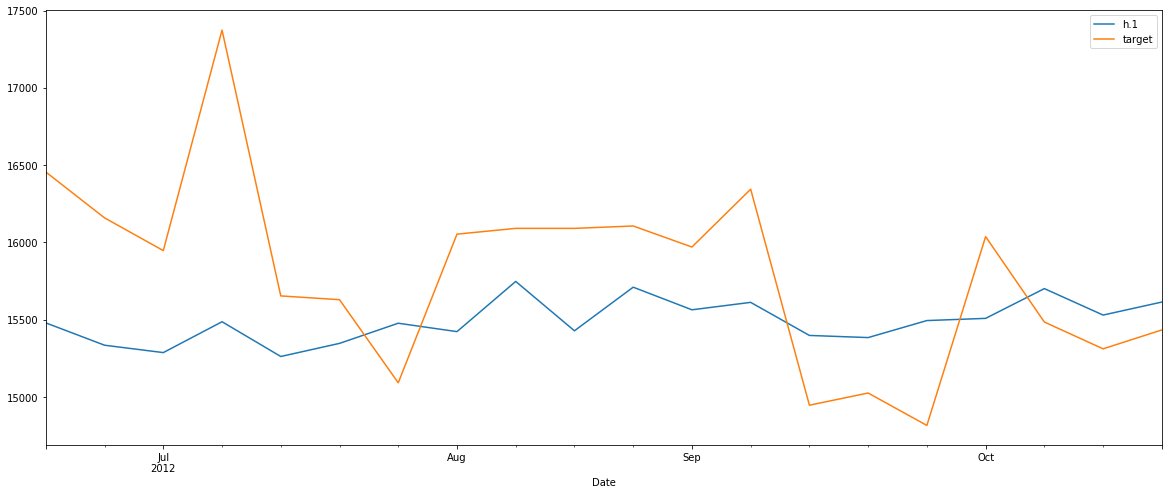

In [44]:
horizon = 1
forecasts = res.forecast(horizon=horizon, start=split_date, method='simulation')

horizons = forecasts.mean
horizons['target'] = data

# horizons[split_date:].plot(figsize=(20,8))
horizons.tail(20).plot(figsize=(20,8))
plt.show()

# Clean Start 

In [45]:
def wmae_train(test, pred): # WMAE for train
    weights = X_train['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error  

def wmae_cv(test, pred): # WMAE for CV
    weights = X_cv['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [24]:
df_train = pd.read_csv('Raw Data/train.csv') 

In [27]:
df_train.drop(columns=['IsHoliday','Store','Dept'],inplace=True)

In [36]:
df_train["Date"] = pd.to_datetime(df_train["Date"])

In [37]:
ts_train = df_train[:int(0.7*(len(df_train)))]
ts_test = df_train[int(0.7*(len(df_train))):]